In [ ]:

import os
import matplotlib.pyplot as plt

In [2]:
data_dir = r'C:\Users\pusha\OneDrive\Documents\housing_pred\chest_xray'

print (os.listdir(data_dir))
classes = os.listdir(data_dir + './train')
print (classes)


['test', 'train']
['NORMAL', 'PNEUMONIA']


In [3]:
pneumonia_files = os.listdir(data_dir + '/train/PNEUMONIA')
print (len(pneumonia_files))
print (pneumonia_files[:5])

3875
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']


In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Dense, Flatten, BatchNormalization, Conv2D, GlobalAveragePooling2D, MaxPool2D, Dropout
from keras.models import Model, Sequential
from keras.applications.resnet_v2 import preprocess_input, ResNet50V2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np

TRANSFERING THE MODEL

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
vgg = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob(data_dir + '/train/*')

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


DATA AUGMENTATION

In this section we have used certain techniques like rescaling, horizontal flipping, etc to augment more samples out of the existing data set. This is done if we have limited amount of data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_path = data_dir+'/train'
test_path = data_dir+'/test'

In [ ]:
training_set= train_datagen.flow_from_directory(train_path, 
                                                target_size = (224,224),
                                                batch_size= 32,
                                                class_mode= 'categorical')


Found 5216 images belonging to 2 classes.


In [ ]:
testing_set = test_datagen.flow_from_directory(test_path, 
                                                target_size = (224,224),
                                                batch_size= 32,
                                                class_mode= 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(
                    filepath=r"C:\Users\pusha\OneDrive\Documents\housing_pred\PneumonoVGG16.h5",
                    monitor='accuracy',
                    verbose=1,
                    save_best_only=True)


In [ ]:
rfit = model.fit(
    training_set,
    validation_data = testing_set,
    epochs = 10,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)   
)

Epoch 1/10
163/163 [==============================] - 76s 458ms/step - loss: 0.2678 - accuracy: 0.9066 - val_loss: 0.2289 - val_accuracy: 0.9167
Epoch 2/10
163/163 [==============================] - 65s 395ms/step - loss: 0.1562 - accuracy: 0.9400 - val_loss: 0.2627 - val_accuracy: 0.9071
Epoch 3/10
163/163 [==============================] - 66s 405ms/step - loss: 0.1260 - accuracy: 0.9540 - val_loss: 0.2933 - val_accuracy: 0.9087
Epoch 4/10
163/163 [==============================] - 72s 442ms/step - loss: 0.1202 - accuracy: 0.9574 - val_loss: 0.2554 - val_accuracy: 0.9167
Epoch 5/10
163/163 [==============================] - 104s 636ms/step - loss: 0.1200 - accuracy: 0.9565 - val_loss: 0.2547 - val_accuracy: 0.9151
Epoch 6/10
163/163 [==============================] - 121s 745ms/step - loss: 0.1013 - accuracy: 0.9618 - val_loss: 0.4657 - val_accuracy: 0.8766
Epoch 7/10
163/163 [==============================] - 67s 409ms/step - loss: 0.1146 - accuracy: 0.9574 - val_loss: 0.7993 - val_

In [ ]:
h = rfit.history

C:\Users\pusha\AppData\Local\Temp\ipykernel_18228\1169769377.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'], 'go--',c="blue")


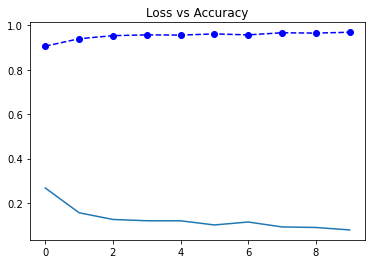

In [ ]:
plt.plot(h['loss'])
plt.plot(h['accuracy'], 'go--',c="blue")
plt.title('Loss vs Accuracy')
plt.show()

In [ ]:
from keras_preprocessing.image import load_img, img_to_array

TESTING THE MODEL

1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pneumonia


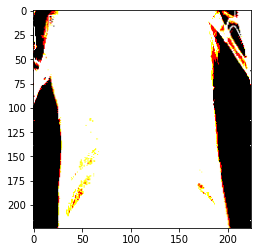

In [ ]:
path = r"C:\Users\pusha\OneDrive\Documents\housing_pred\chest_xray\test\PNEUMONIA\person1_virus_7.jpeg"
img = load_img(path, target_size=(224,224))

img_arr = img_to_array(img)

img_arr = preprocess_input(img_arr)

input_arr = np.array([img_arr])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("Normal")
else:
    print("Pneumonia")
plt.imshow(input_arr[0])
plt.show()

